## Respondendo as novas perguntas do CEO



### 1.Qual o número de imóveis por ano de construção ? 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [37]:
pwd!

'c:\\Users\\mathe\\Desktop\\PowerBi\\Comunidade_DS\\curso_python_zero_ds\\modulo_3\\base_de_dados'

In [38]:
data = pd.read_csv('kc_house_data.csv', )

In [39]:
## vou utilizar um groupby para colocar filtro no anos e a variável que vou agrupar será o id 
df_grouped_yr_built = data[['id', 'yr_built']].groupby('yr_built').count()

print(df_grouped_yr_built)



           id
yr_built     
1900       87
1901       29
1902       27
1903       46
1904       45
...       ...
2011      130
2012      170
2013      201
2014      559
2015       38

[116 rows x 1 columns]


### 2. Qual o menor número de quartos por ano de construção de imóveis  ?

In [40]:
data[['bedrooms', 'yr_built']].groupby('yr_built').min().reset_index()

yr_built  bedrooms
0        1900         1
1        1901         2
2        1902         2
3        1903         1
4        1904         2
..        ...       ...
111      2011         1
112      2012         2
113      2013         2
114      2014         1
115      2015         1

[116 rows x 2 columns]

### 3. Qual o preço de compra mais alto por cada número de quarto 

In [41]:
## vou agrupar os quartos e verificar a imóvel mais caro de acordo com número do quarto
data[['bedrooms', 'price']].groupby('bedrooms').max().reset_index()

bedrooms      price
0          0 1295650.00
1          1 1247000.00
2          2 3278000.00
3          3 3800000.00
4          4 4489000.00
5          5 7062500.00
6          6 7700000.00
7          7 3200000.00
8          8 3300000.00
9          9 1400000.00
10        10 1148000.00
11        11  520000.00
12        33  640000.00

### 4.Qual a soma de todos os preços de compra por número de quartos ? 

In [42]:

sum_bedrooms = data[['bedrooms', 'price']].groupby('bedrooms').sum()



### 5. Qual a soma de todos os preços de compra por número de quartos e banheiros ? 

In [43]:
data[['bedrooms', 'bathrooms', 'price']].groupby(['bathrooms','bedrooms']).sum().reset_index()

bathrooms  bedrooms      price
0         0.00         0 3642600.00
1         0.00         1  839000.00
2         0.50         1  255000.00
3         0.50         2  382000.00
4         0.50         4  312500.00
..         ...       ...        ...
139       6.75         7  800000.00
140       7.50         9  450000.00
141       7.75         6 6885000.00
142       8.00         6 7700000.00
143       8.00         7 2280000.00

[144 rows x 3 columns]

###

In [44]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

### 6. Qual o tamanho médio das salas dos imóveis por ano de construção ?

In [45]:
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

sqft_living
yr_built             
1900          1732.01
1901          1763.62
1902          1919.63
1903          1507.74
1904          1603.18
...               ...
2011          2313.68
2012          2378.74
2013          2636.59
2014          2615.39
2015          2596.32

[116 rows x 1 columns]

### 7. Qual o tamanho mediano das sala dos imóveis por ano de construção ? 

In [46]:
data[['sqft_living', 'yr_built']].groupby('yr_built').median().reset_index()

yr_built  sqft_living
0        1900      1540.00
1        1901      1610.00
2        1902      1600.00
3        1903      1505.00
4        1904      1280.00
..        ...          ...
111      2011      2270.00
112      2012      2237.50
113      2013      2580.00
114      2014      2650.00
115      2015      2590.00

[116 rows x 2 columns]

#### 8. Qual o desvio - padrão do tamanho das salas dos imóveis por ano de construção ? 

In [47]:
data[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

yr_built  sqft_living
0        1900       732.94
1        1901       668.23
2        1902       878.66
3        1903       469.72
4        1904      1076.87
..        ...          ...
111      2011       804.86
112      2012       771.43
113      2013       883.50
114      2014       893.81
115      2015      1155.61

[116 rows x 2 columns]

### 9. Como é o crescimento médio de preços de compras dos imóveis, por ano , por dia e pela semana do ano ? 

In [48]:
### primeiro para calcular o crescimento médio ao longo dos anos , preciso criar uma coluna de ano 

data['year'] = pd.to_datetime(data['date']).dt.year

data[['year', 'price']].groupby('year').sum().reset_index()

year         price
0  2014 7889841842.00
1  2015 3783083166.00

### Mostrando o dashboards de resultado

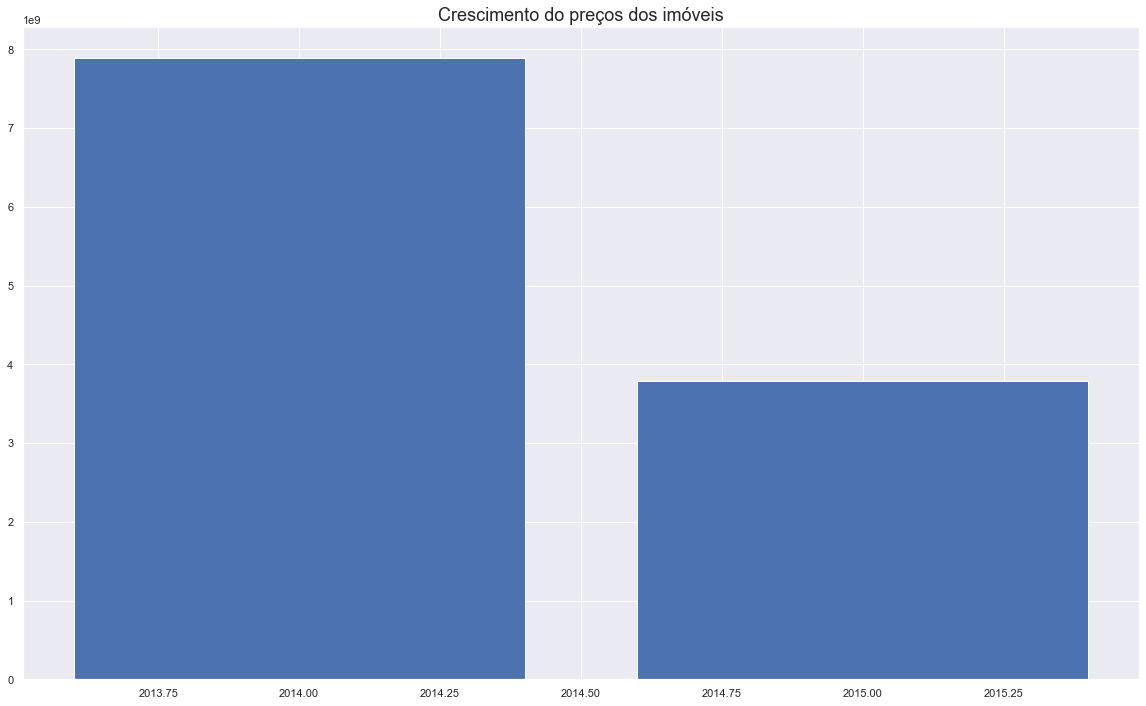

In [49]:

data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['year', 'price']].groupby('year').sum().reset_index()
eixo_x = by_year['year']
eixo_y = by_year['price']


fig, ax = plt.subplots(figsize = (20,12))

ax.bar (eixo_x, eixo_y)
ax.set_title('Crescimento do preços dos imóveis', fontsize = 18)
plt.show()


# plt.bar(data['year'], data['price'])





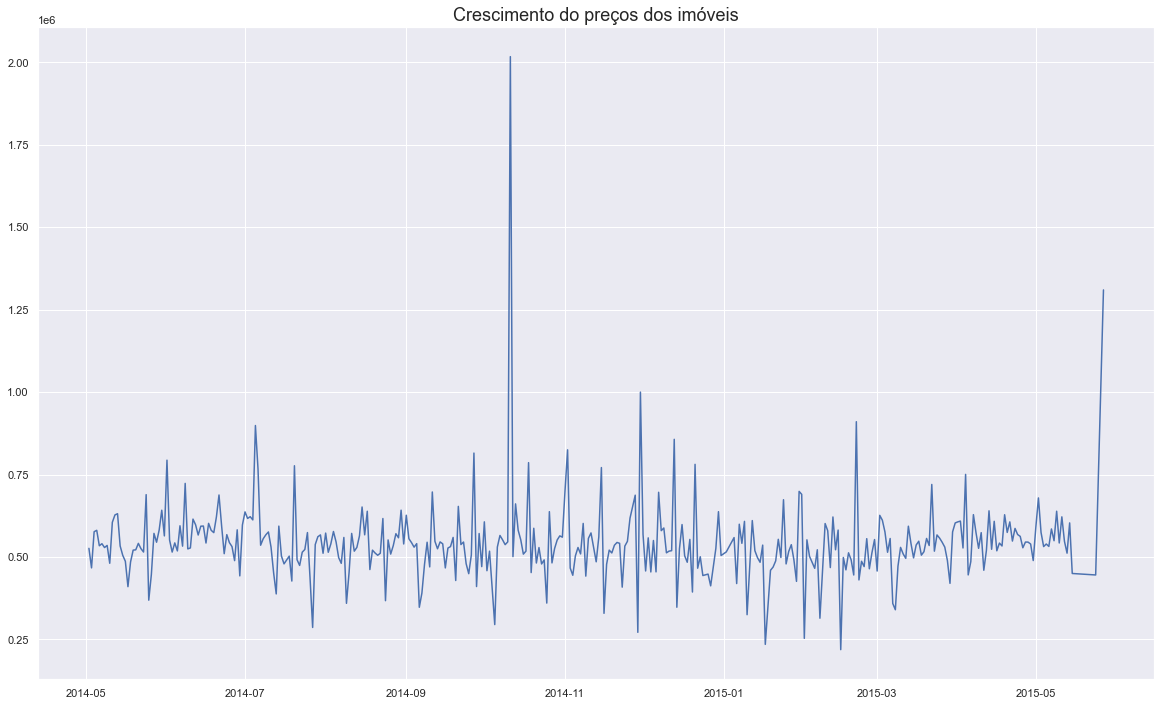

In [50]:
#### gráfico de linha preços médio ao longo dos dias do anos

data['day'] = pd.to_datetime(data['date'])
by_day = data[['day', 'price']].groupby('day').mean().reset_index()
eixo_x = by_day['day']
eixo_y = by_day['price']


fig, ax = plt.subplots(figsize = (20,12))

ax.plot(eixo_x, eixo_y)
ax.set_title('Crescimento do preços dos imóveis', fontsize = 18)
plt.show()

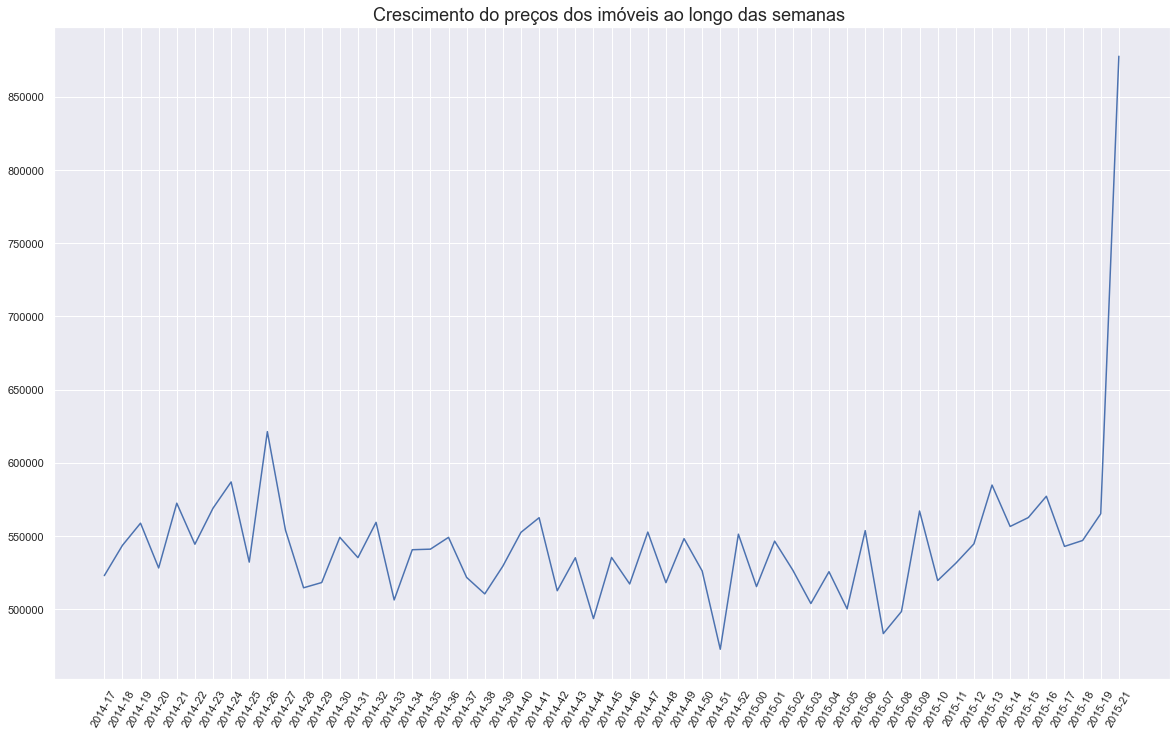

In [51]:
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
eixo_x = by_year_week['year_week']
eixo_y = by_year_week['price']


fig, ax = plt.subplots(figsize = (20,12))

ax.plot(eixo_x, eixo_y)
# rotacionando os dados do eixo x em 60 graus gráfico 
plt.xticks(rotation = 60);
ax.set_title('Crescimento do preços dos imóveis ao longo das semanas ', fontsize = 18)
plt.show()

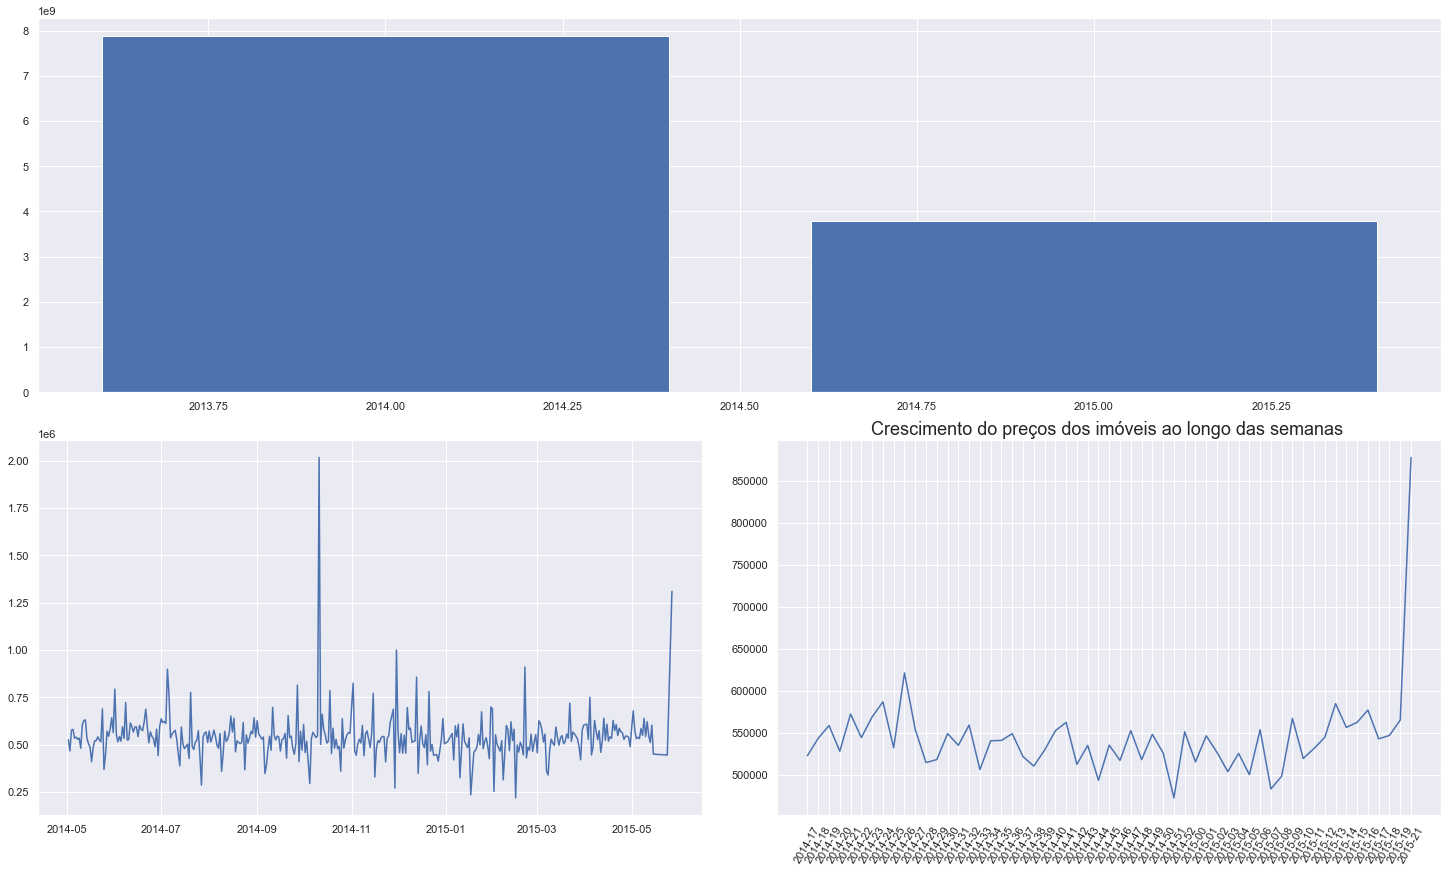

In [52]:
### criando dashboard utilizando os gráficos acima 

fig = plt.figure(figsize=(20, 12), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
#annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
#annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
#annotate_axes(ax11, 'ax11')


## first graph 

data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['year', 'price']].groupby('year').sum().reset_index()

ax0.bar(by_year['year'], by_year['price'])

### second graph 
data['day'] = pd.to_datetime(data['date'])
by_day = data[['day', 'price']].groupby('day').mean().reset_index()

ax10.plot(by_day['day'], by_day['price'])

### third graph 

data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
plt.xticks(rotation = 60);
ax11.set_title('Crescimento do preços dos imóveis ao longo das semanas ', fontsize = 18)

ax11.plot(by_year_week['year_week'], by_year_week['price'])


In [53]:
data.dtypes

id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
day              datetime64[ns]
year_week                object
dtype: object

### Mapa para indetificar os preços de cada imóvel 

In [54]:
import plotly.express as px 
houses = data[['id','lat','long','price']]
# Creating and visualizing a scatter plot on Mapbox
fig = px.scatter_mapbox(houses, lat='lat', lon='long',
                  color="price", 
                  size = 'price',
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  size_max=70, 
                  zoom=0.75, 
                  hover_name='id', 
                  hover_data = ['price', 'lat', 'long'], 
                  title = 'Preços dos imóveis nas regiões')

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height = 600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Novos exercícios (CEO pediu novas informações)


1. Crie uma nova chamada: ‘dormitory_type’
    - Se o valor ‘bedrooms’ for igual à 1 ⇒ ‘studio’
    - Se o valor da coluna ‘bedrooms’ for igual à 2 ⇒ ‘apartament’
    - Se o valor da coluna ‘bedrooms’ for maior que 2 ⇒ 'house'

In [55]:
data['dormitory_type']= data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house' if x > 2 else 'NA')

In [56]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

2. Faça uma gráfico de barras que represente a soma dos preços pelo número de quartos 

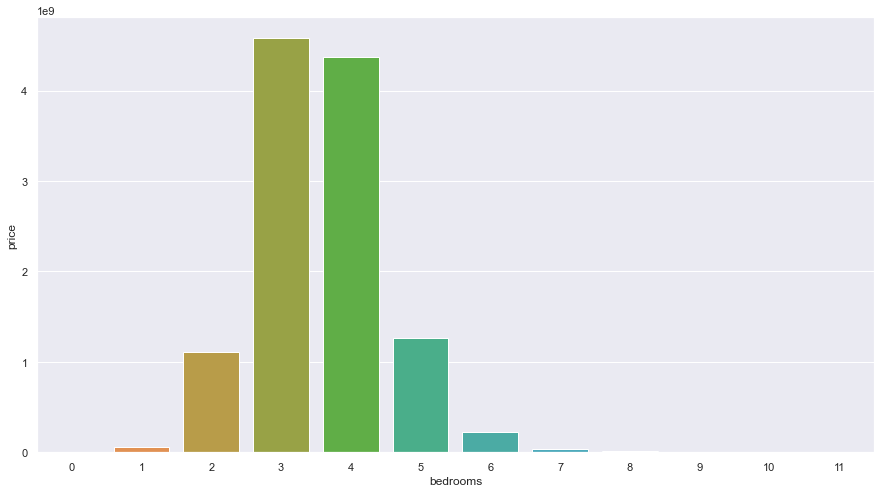

In [64]:
data.drop(data.loc[data['bedrooms']== 33].index, inplace=True)

price_per_room = data[['price', 'bedrooms', 'id']].groupby('bedrooms').sum().reset_index()
qtd = data[['id','bedrooms']].groupby('id').count()

sns.set_theme(style="darkgrid")

sns.barplot(x= 'bedrooms' , y= 'price' , data= price_per_room);

 3. Faça um gráfico de linha que represente a média dos preços pelo ano construção dos imóveis

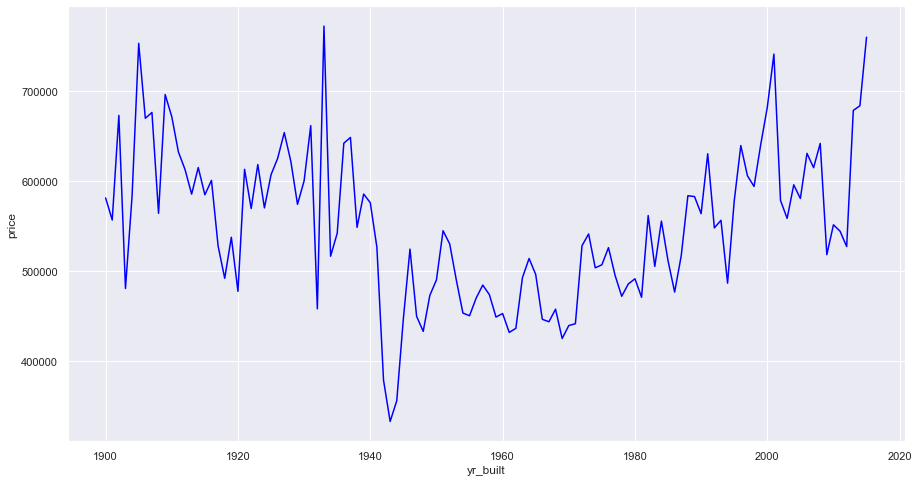

In [58]:


media = data[['price','yr_built']].groupby('yr_built').mean().reset_index()

sns.set_theme(style= 'darkgrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = media, x = 'yr_built', y = 'price', color = 'blue');



 4.Faça uma gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

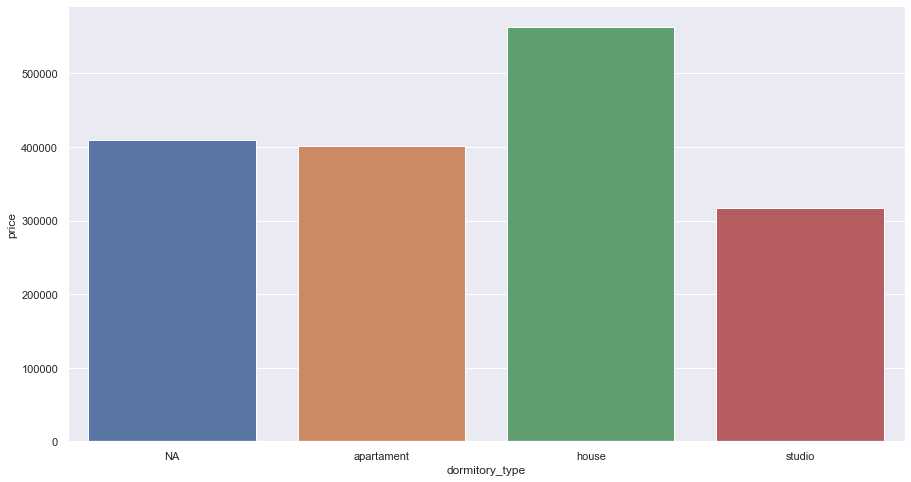

In [63]:
price_per_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type')['price'].mean().reset_index()
sns.set_theme(style="darkgrid")

sns.barplot(x= 'dormitory_type' , y= 'price' , data= price_per_dormitory);

5.  Faça uma gráfico de linha que moste a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930

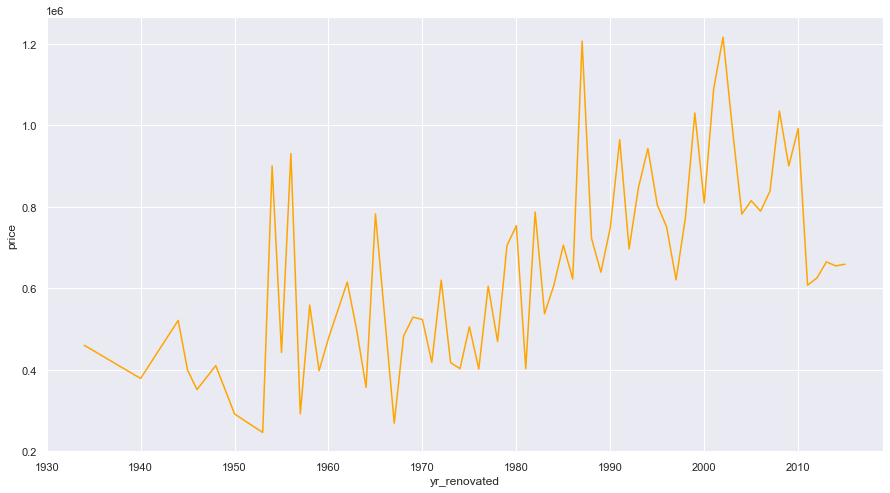

In [69]:
media_partir_1930 = data.loc[data['yr_renovated'] > 1930, ['yr_renovated','price']].groupby('yr_renovated').mean()


sns.set_theme(style= 'darkgrid')
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = media_partir_1930, x = 'yr_renovated', y = 'price', color = 'orange');

6.Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis

In [73]:
### fazendo a tabela contendo os dados 


df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()


df.head()

dormitory_type       price
0             NA 409503.8462
1     apartament 401372.6819
2          house 563088.0859
3         studio 317642.8844

7. Crie um dashboard com os gráficos das questões 02, 03 , 04 (Dashboard, 1 Linha e 2 colunas)  

<BarContainer object of 4 artists>

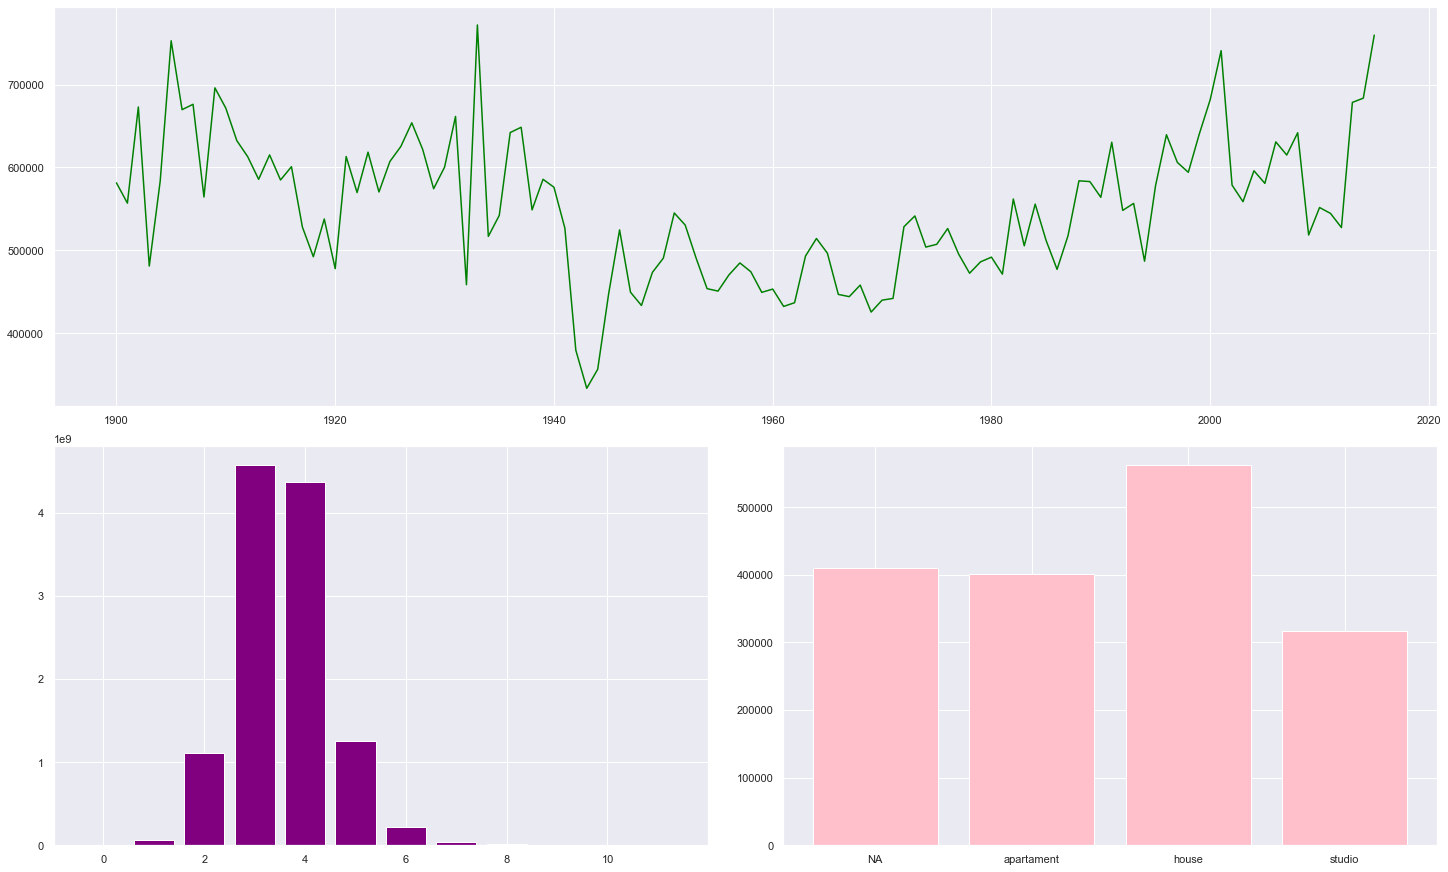

In [93]:
### criando dashboard utilizando os gráficos acima 

fig = plt.figure(figsize=(20, 12), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax_0 = fig.add_subplot(spec[0, :])
#annotate_axes(ax0, 'ax0')

ax_10 = fig.add_subplot(spec[1, 0])
#annotate_axes(ax10, 'ax10')

ax_11 = fig.add_subplot(spec[1, 1])
#annotate_axes(ax11, 'ax11')


## o gráfico de linha da questão 03 fica na parte de cima do dashboard 

media = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax_0.plot(media['yr_built'], media['price'], color = 'green');


## o gráfico de linha da questão 02 fica na parte de baixo do gráfico junto com gráfico da questão 04
price_per_room = data[['price', 'bedrooms', 'id']].groupby('bedrooms').sum().reset_index()
ax_10.bar(price_per_room['bedrooms'] , price_per_room['price'], color = 'purple' );


price_per_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type')['price'].mean().reset_index()

ax_11.bar( price_per_dormitory['dormitory_type'] , price_per_dormitory['price'], color = 'pink')

7. Crie um dashboard com os gráficos das questões 02, 04 (Dashboard, 2 colunas)  

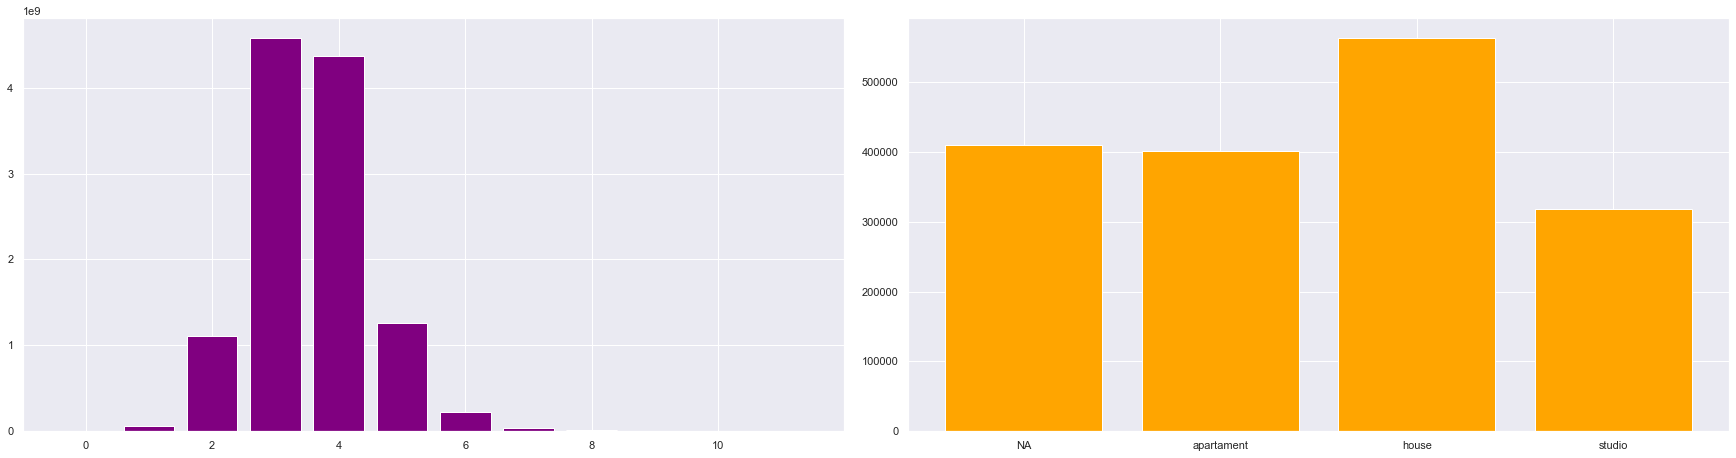

In [97]:
#### Criando dashboard 


fig = plt.figure(figsize=(24, 12), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax_00 = fig.add_subplot(spec[0, 0])
#annotate_axes(ax0, 'ax0')

ax_01 = fig.add_subplot(spec[0, 1])
#annotate_axes(ax10, 'ax10')



#### fazendo gráfico 

price_per_room = data[['price', 'bedrooms', 'id']].groupby('bedrooms').sum().reset_index()
ax_00.bar(price_per_room['bedrooms'] , price_per_room['price'], color = 'purple' );


price_per_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type')['price'].mean().reset_index()

ax_01.bar( price_per_dormitory['dormitory_type'] , price_per_dormitory['price'], color = 'orange');

9. Crie um dashboard com os gráficos das questões 03 , 05 (Dashboard, 2 linhas)

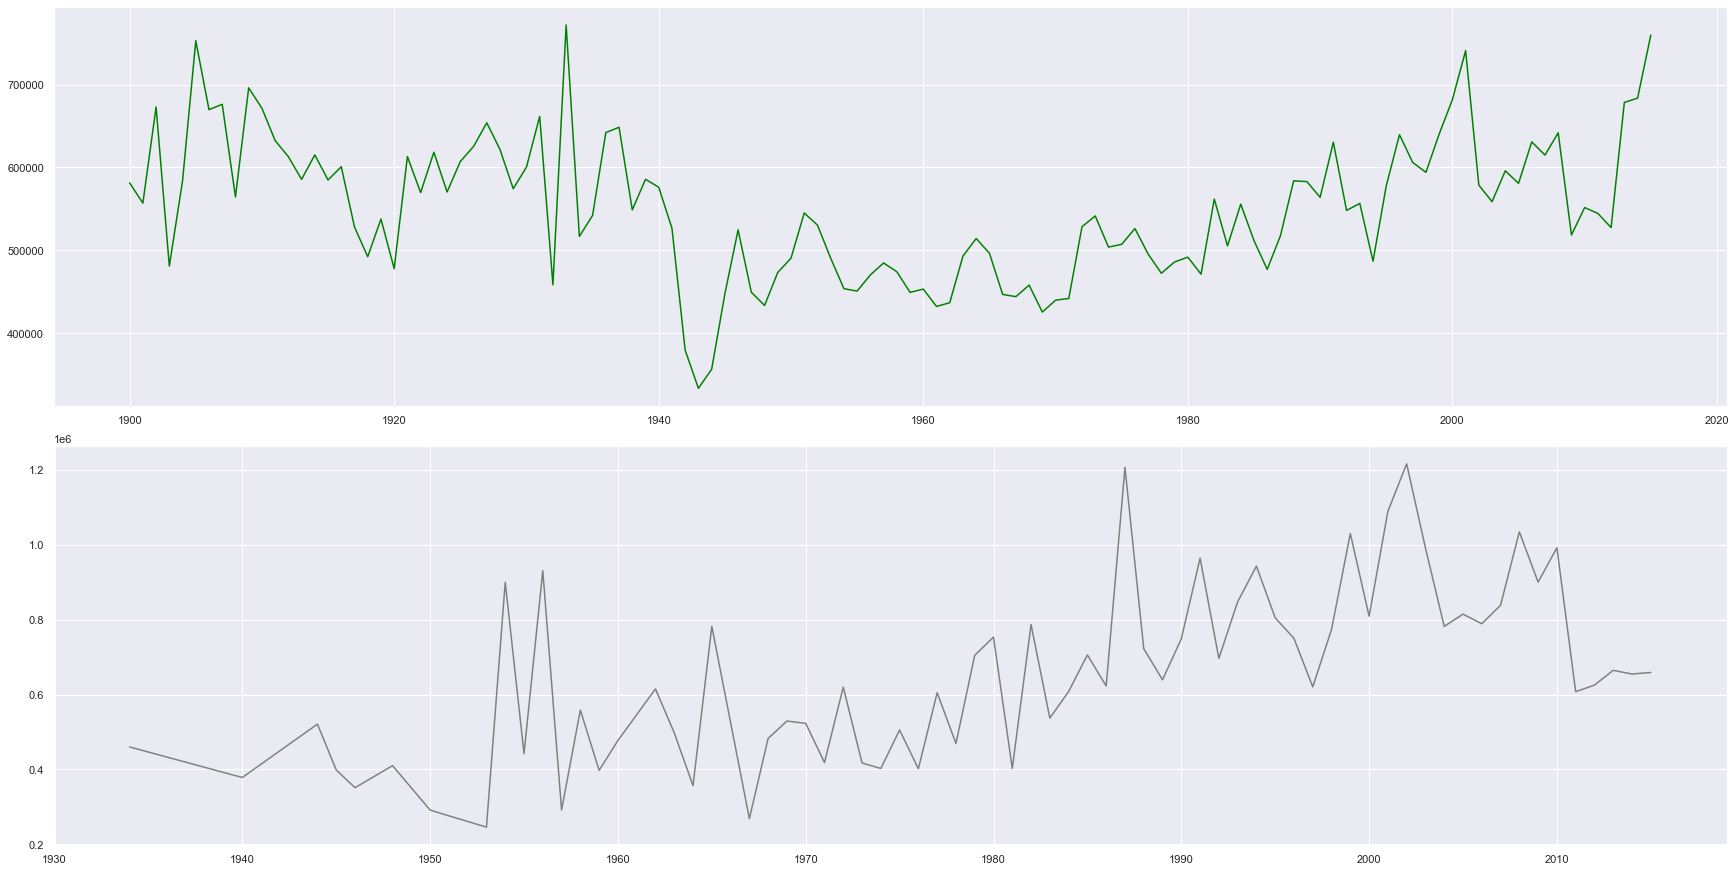

In [104]:
#### Criando dashboard 


fig = plt.figure(figsize=(24, 12), constrained_layout=True)
spec = fig.add_gridspec(2, 1)

ax_000 = fig.add_subplot(spec[0, 0])
#annotate_axes(ax0, 'ax0')

ax_001 = fig.add_subplot(spec[1, 0])
#annotate_axes(ax10, 'ax10')

### questão 03 
media = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax_000.plot(media['yr_built'], media['price'], color = 'green');

# ### gráfico questão 05 

media_partir_1930 = data.loc[data['yr_renovated'] > 1930, ['yr_renovated','price']].groupby('yr_renovated').mean().reset_index()
ax_001.plot(media_partir_1930['yr_renovated'], media_partir_1930['price'], color = 'gray');

10 Faça uma gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [107]:
import plotly.express as px 
houses = data[['id','lat','long','sqft_living']]
# Creating and visualizing a scatter plot on Mapbox
fig = px.scatter_mapbox(houses, lat='lat', lon='long',
                  #color="sqft_living", 
                  size = 'sqft_living',
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  size_max=70, 
                  zoom=0.75, 
                  hover_name='id', 
                  hover_data = ['lat', 'long'], 
                  title = 'Classficação dos imóveis de acordo com tamanho da sala')

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height = 600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()